In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
df = pd.read_csv('CombinedBettingData3.csv')
df.head()

,Unnamed: 0,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps
0,0,SAC,UTA,11.0,40.0,0.216,29.0,22.0,0.569,2009-02-06,-4,-2,Pinnacle Sports,-3,Sportsbetting,-2.875,8
1,1,POR,UTA,29.0,17.0,0.630,26.0,22.0,0.542,2009-01-31,14,9,5Dimes,9,5Dimes,9.000,8
2,2,MEM,UTA,11.0,28.0,0.282,24.0,16.0,0.600,2009-01-16,-10,-4,5Dimes,-4,5Dimes,-4.000,8
3,3,UTA,IND,23.0,15.0,0.605,13.0,25.0,0.342,2009-01-12,7,10,Bovada,9,Sportsbetting,9.250,8
4,4,HOU,UTA,20.0,11.0,0.645,18.0,14.0,0.563,2008-12-27,5,9,5Dimes,9,5Dimes,9.000,8


In [2]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.columns

Index(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin', 'ATLoss',
       'AT%', 'Date', 'WinMargin', 'TopLine', 'TLCompany', 'BotLine',
       'BLCompany', 'Average', 'NumComps'],
      dtype='object')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Weekday'] = df['Date'].dt.dayofweek
df = df.sort_values(by=['Date'])
df = df.reset_index()
df = df.drop(['index','Date'], axis=1)
df.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps,Year,Month,Week,Weekday
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,9,5,Pinnacle Sports,4,Bookmaker,4.75,4,2006,11,44,2
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,10,7,Bookmaker,7,Bookmaker,7.00,4,2006,11,44,2
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,-1,5,Bovada,4,5Dimes,4.75,4,2006,11,44,2
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,15,-1,Bookmaker,-2,Bovada,-1.25,4,2006,11,44,2
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,3,6,Bovada,6,Bovada,6.00,4,2006,11,44,2


In [4]:
df['average'] = df['Average']
df = df.drop(['Average'], axis=1)
cols_at_end = ['WinMargin']
df = df[[c for c in df if c not in cols_at_end] + [c for c in cols_at_end if c in df]]

In [5]:
df2 = df.copy(deep=True)
df2.loc[df2['WinMargin'] < 0, 'HTLoss'] = df2['HTLoss']-1
df2.loc[df2['WinMargin'] >= 0, 'HTWin'] = df2['HTWin']-1
df2.loc[df2['WinMargin'] < 0, 'ATWin'] = df2['ATWin']-1
df2.loc[df2['WinMargin'] >= 0, 'ATLoss'] = df2['ATLoss']-1
df2['HT%'] = df2['HTWin']/(df2['HTWin'] + df2['HTLoss'])
df2['AT%'] = df2['ATWin']/(df2['ATWin'] + df2['ATLoss'])
df2 = df2.fillna(0)
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,WinMargin
0,MIN,SAC,0.0,0.0,0.0,0.0,0.0,0.0,5,Pinnacle Sports,4,Bookmaker,4,2006,11,44,2,4.75,9
1,NJN,TOR,0.0,0.0,0.0,0.0,0.0,0.0,7,Bookmaker,7,Bookmaker,4,2006,11,44,2,7.00,10
2,MEM,NYK,0.0,0.0,0.0,0.0,0.0,0.0,5,Bovada,4,5Dimes,4,2006,11,44,2,4.75,-1
3,ORL,CHI,0.0,0.0,0.0,1.0,0.0,1.0,-1,Bookmaker,-2,Bovada,4,2006,11,44,2,-1.25,15
4,CLE,WAS,0.0,0.0,0.0,0.0,0.0,0.0,6,Bovada,6,Bovada,4,2006,11,44,2,6.00,3


In [6]:
df2.loc[df2['WinMargin'] < df2['average'], 'TrueOver'] = 0
df2.loc[df2['WinMargin'] >= df2['average'], 'TrueOver'] = 1

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
def linregger(frame, size):
    train=frame[0:(round(len(frame)*.8))] 
    test=frame[(round(len(frame)*.8)):]
    trains = np.split(train, [size], axis=1)
    train_x=trains[0]
    train_y=trains[1]
    tests = np.split(test, [size], axis=1)
    test_x=tests[0]
    test_y=tests[1]
    reg = LinearRegression().fit(train_x.values, train_y.values)
    train_y2 = train_y.copy(deep=True)
    test_y2 = test_y.copy(deep=True)
    train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
    test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
    train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
    test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
    train_y3 = train_y2.copy(deep=True)
    test_y3 = test_y2.copy(deep=True)
    train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
    train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
    train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
    train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
    test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
    test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
    test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
    test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
    trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
    print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
    testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
    print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

# Time Analysis

In [8]:
df2.columns

Index(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin', 'ATLoss',
       'AT%', 'TopLine', 'TLCompany', 'BotLine', 'BLCompany', 'NumComps',
       'Year', 'Month', 'Week', 'Weekday', 'average', 'WinMargin', 'TrueOver'],
      dtype='object')

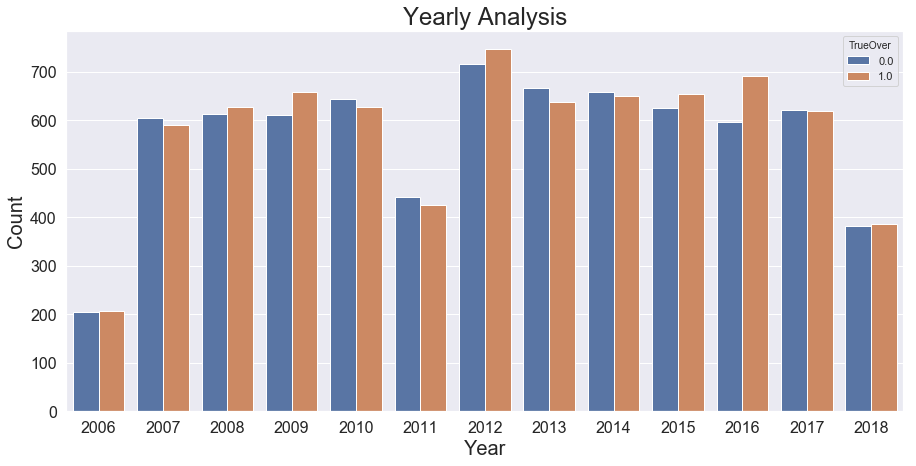

In [9]:
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.countplot(x="Year", hue="TrueOver", data=df2)
ax.set_title("Yearly Analysis", fontsize=24)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

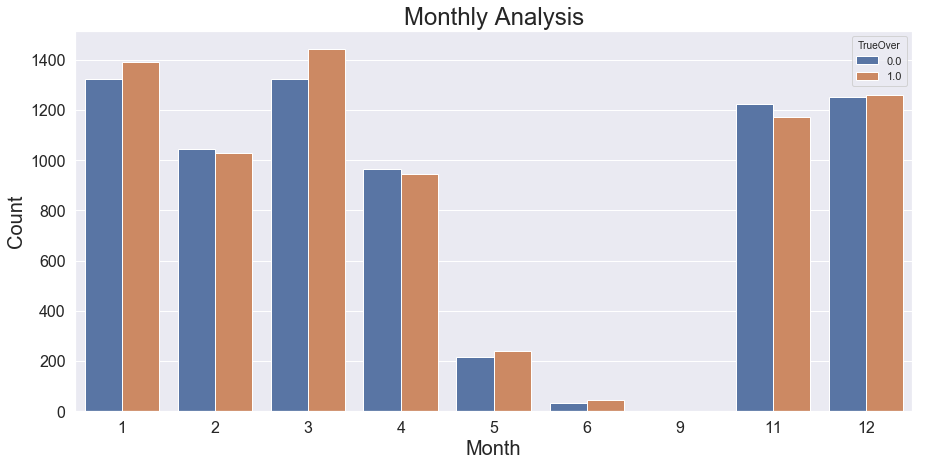

In [10]:
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.countplot(x="Month", hue="TrueOver", data=df2)
ax.set_title("Monthly Analysis", fontsize=24)
ax.set_xlabel("Month",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

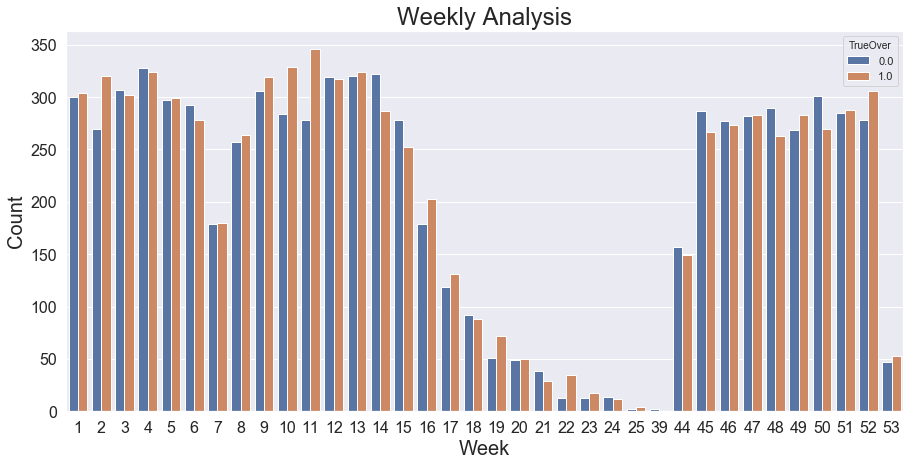

In [11]:
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.countplot(x="Week", hue="TrueOver", data=df2)
ax.set_title("Weekly Analysis", fontsize=24)
ax.set_xlabel("Week",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

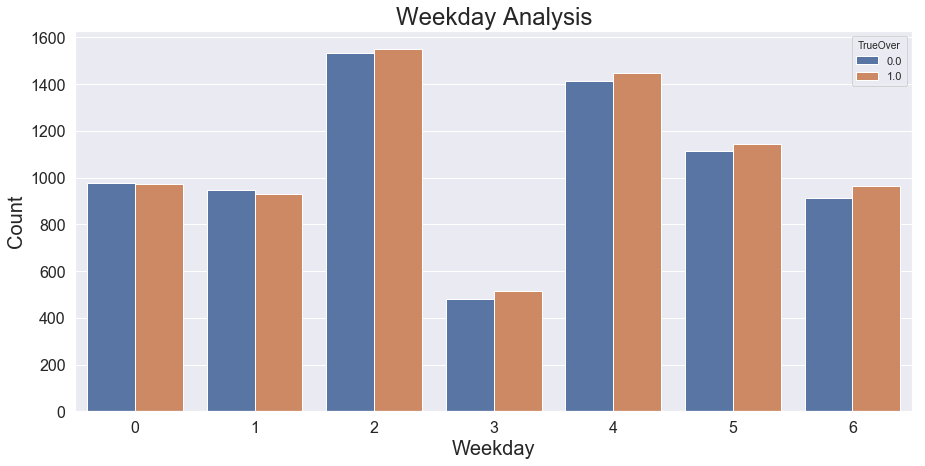

In [12]:
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.countplot(x="Weekday", hue="TrueOver", data=df2)
ax.set_title("Weekday Analysis", fontsize=24)
ax.set_xlabel("Weekday",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

# Team Analysis

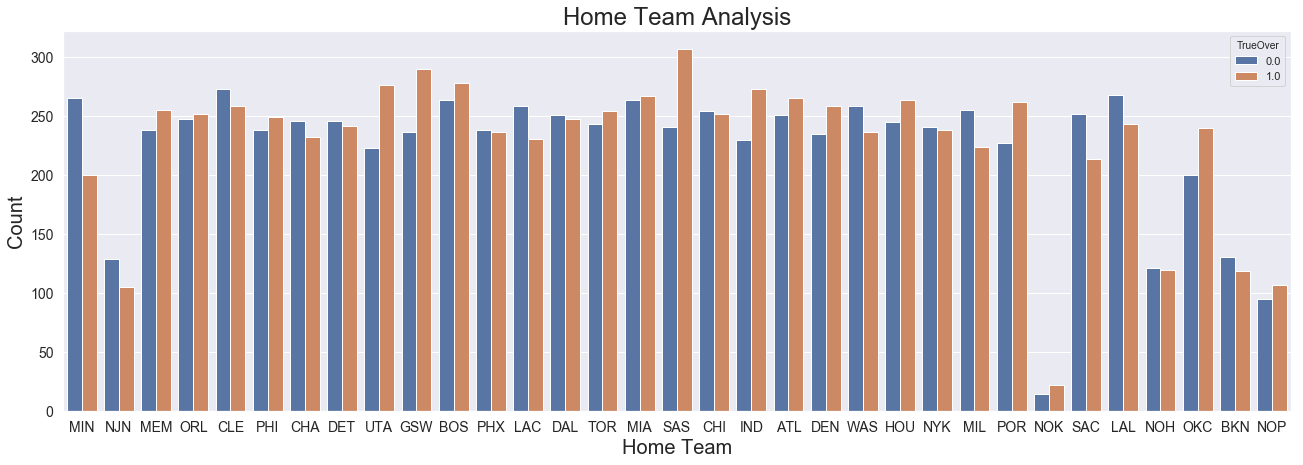

In [13]:
sns.set(rc={'figure.figsize':(22,7)})
ax = sns.countplot(x="HomeTeam", hue="TrueOver", data=df2)
ax.set_title("Home Team Analysis", fontsize=24)
ax.set_xlabel("Home Team",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=14)
plt.show()

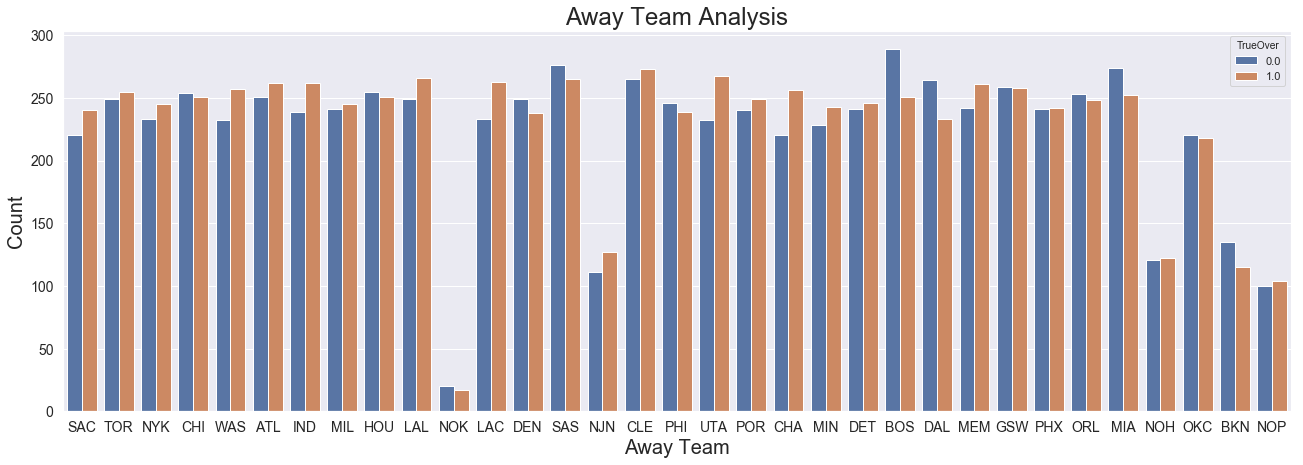

In [14]:
sns.set(rc={'figure.figsize':(22,7)})
ax = sns.countplot(x="AwayTeam", hue="TrueOver", data=df2)
ax.set_title("Away Team Analysis", fontsize=24)
ax.set_xlabel("Away Team",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=14)
plt.show()

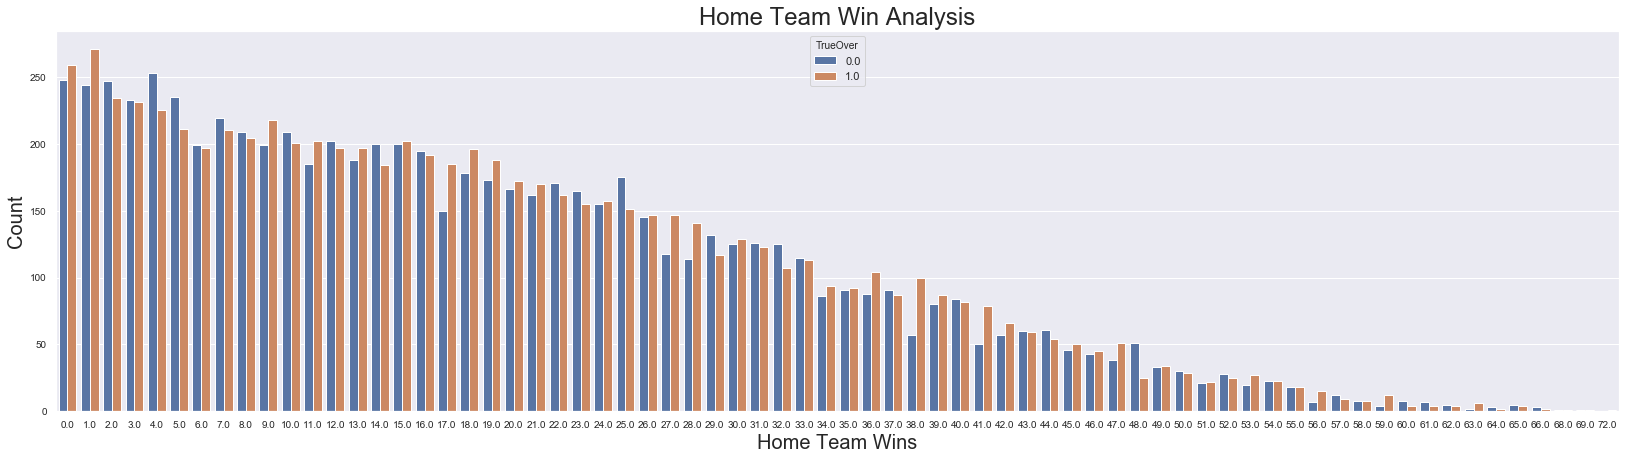

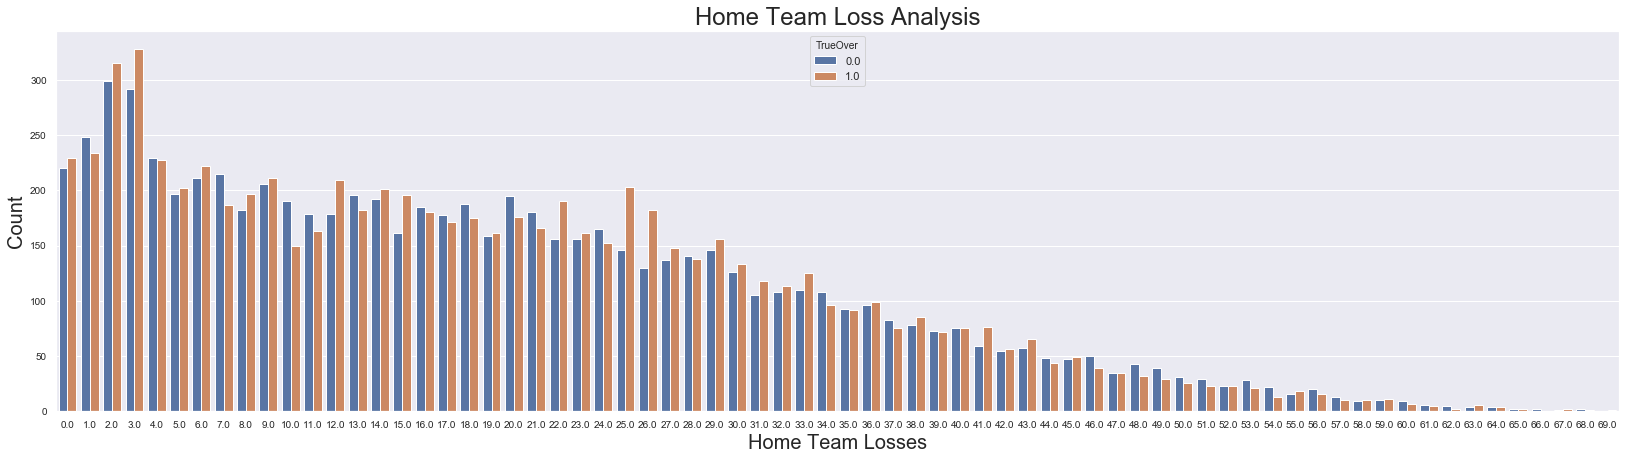

In [15]:
sns.set(rc={'figure.figsize':(28,7)})
ax = sns.countplot(x="HTWin", hue="TrueOver", data=df2)
ax.set_title("Home Team Win Analysis", fontsize=24)
ax.set_xlabel("Home Team Wins",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=10)
plt.show()
sns.set(rc={'figure.figsize':(28,7)})
ax = sns.countplot(x="HTLoss", hue="TrueOver", data=df2)
ax.set_title("Home Team Loss Analysis", fontsize=24)
ax.set_xlabel("Home Team Losses",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=10)
plt.show()

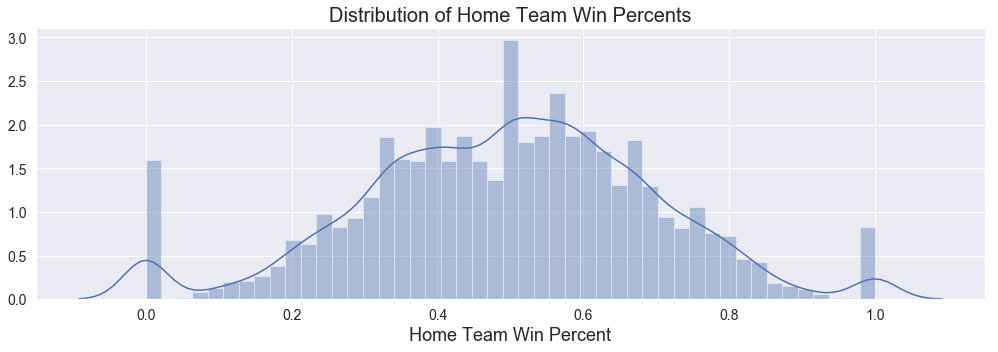

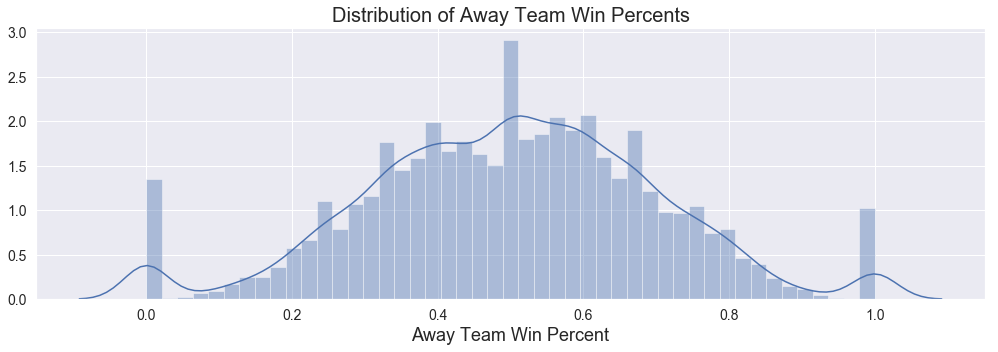

In [21]:
sns.set(rc={'figure.figsize':(17,5)})
ax = sns.distplot(df2['HT%'])
ax.set_title("Distribution of Home Team Win Percents", fontsize=20)
ax.set_xlabel("Home Team Win Percent",fontsize=18)
ax.tick_params(labelsize=14)
plt.show()
sns.set(rc={'figure.figsize':(17,5)})
ax = sns.distplot(df2['AT%'])
ax.set_title("Distribution of Away Team Win Percents", fontsize=20)
ax.set_xlabel("Away Team Win Percent",fontsize=18)
ax.tick_params(labelsize=14)
plt.show()

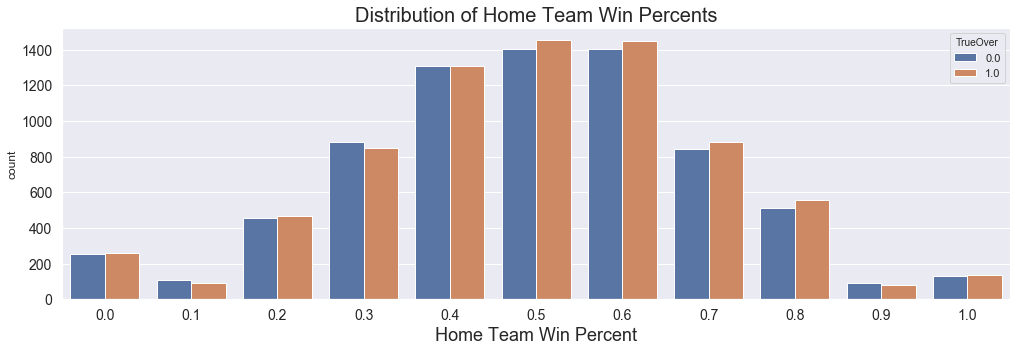

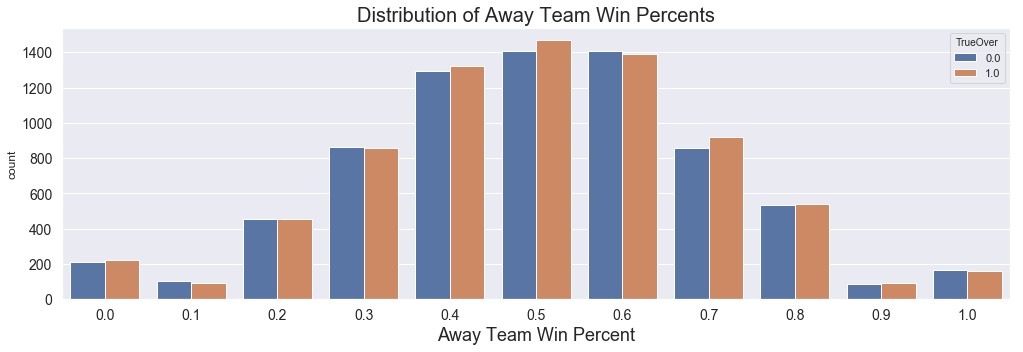

In [24]:
df3 = df2.copy(deep=True)
df3 = df3.round({'HT%': 1, 'AT%': 1})
sns.set(rc={'figure.figsize':(17,5)})
ax = sns.countplot(x="HT%", hue="TrueOver", data=df3)
ax.set_title("Distribution of Home Team Win Percents", fontsize=20)
ax.set_xlabel("Home Team Win Percent",fontsize=18)
ax.tick_params(labelsize=14)
plt.show()
sns.set(rc={'figure.figsize':(17,5)})
ax = sns.countplot(x="AT%", hue="TrueOver", data=df3)
ax.set_title("Distribution of Away Team Win Percents", fontsize=20)
ax.set_xlabel("Away Team Win Percent",fontsize=18)
ax.tick_params(labelsize=14)
plt.show()

# Bettor Analysis

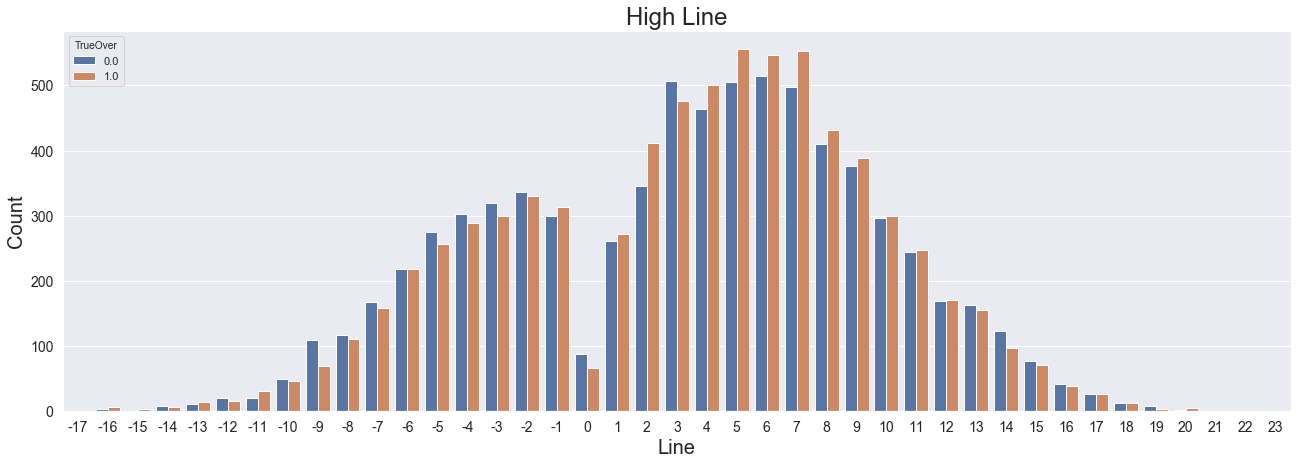

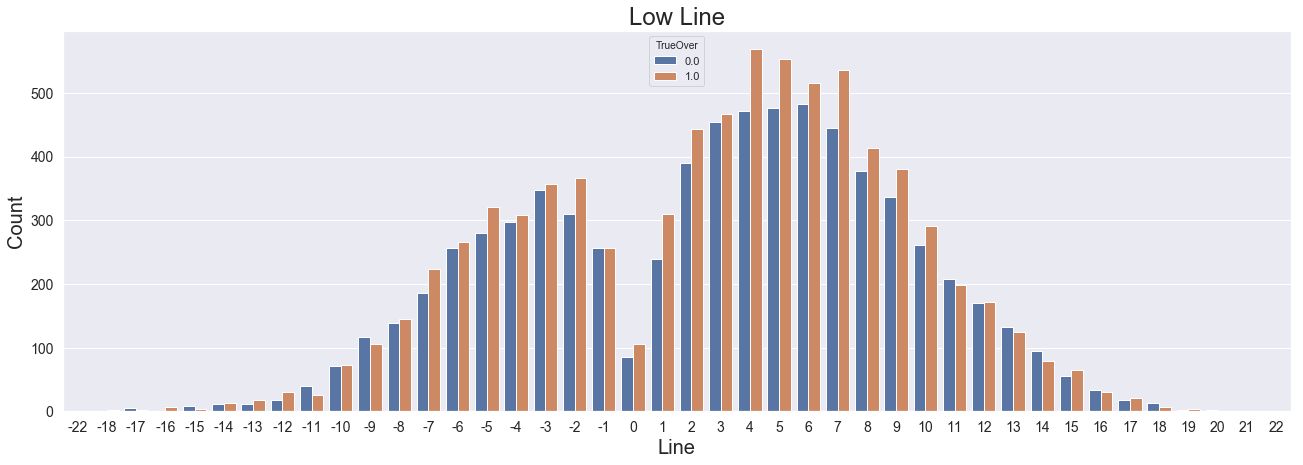

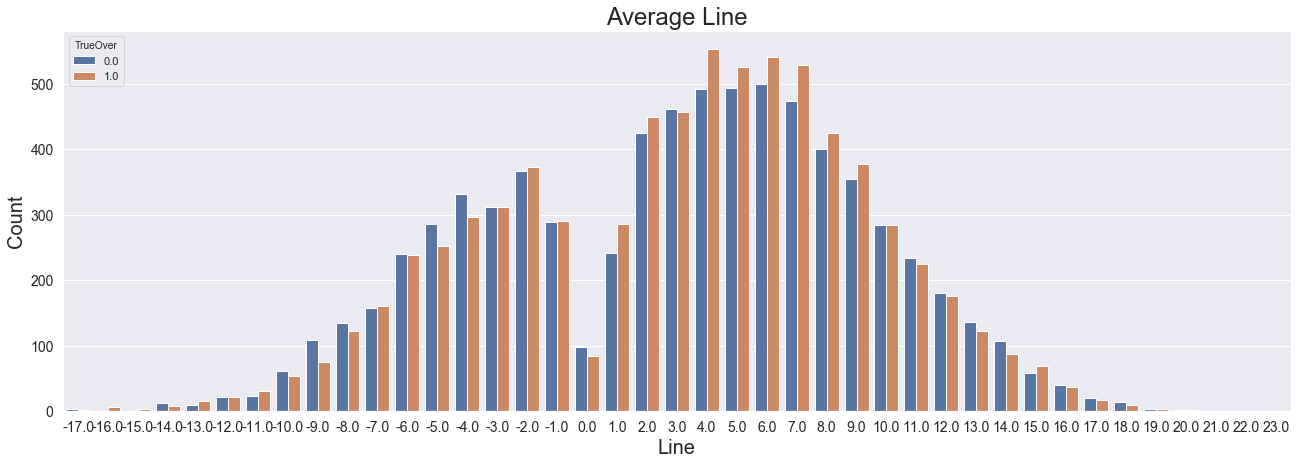

In [31]:
df3 = df2.copy(deep=True)
df3.loc[df3['WinMargin'] < df3['TopLine'], 'TrueOver'] = 0
df3.loc[df3['WinMargin'] >= df3['TopLine'], 'TrueOver'] = 1
sns.set(rc={'figure.figsize':(22,7)})
ax = sns.countplot(x="TopLine", hue="TrueOver", data=df3)
ax.set_title("High Line", fontsize=24)
ax.set_xlabel("Line",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=14)
plt.show()
df3 = df2.copy(deep=True)
df3.loc[df3['WinMargin'] < df3['BotLine'], 'TrueOver'] = 0
df3.loc[df3['WinMargin'] >= df3['BotLine'], 'TrueOver'] = 1
sns.set(rc={'figure.figsize':(22,7)})
ax = sns.countplot(x="BotLine", hue="TrueOver", data=df3)
ax.set_title("Low Line", fontsize=24)
ax.set_xlabel("Line",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=14)
plt.show()
df3 = df2.copy(deep=True)
df3 = df3.round({'average': 0})
sns.set(rc={'figure.figsize':(22,7)})
ax = sns.countplot(x="average", hue="TrueOver", data=df3)
ax.set_title("Average Line", fontsize=24)
ax.set_xlabel("Line",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=14)
plt.show()

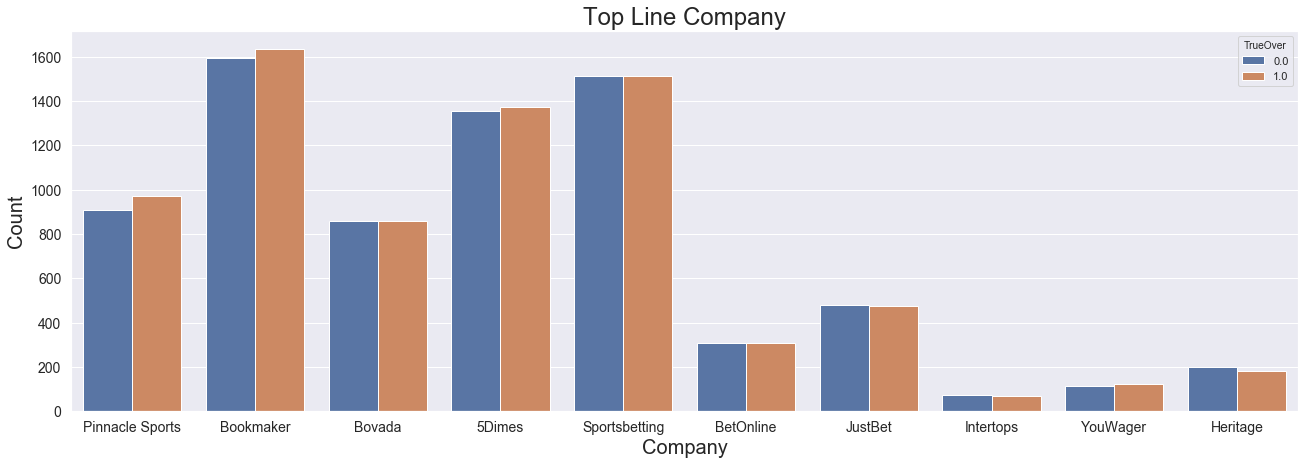

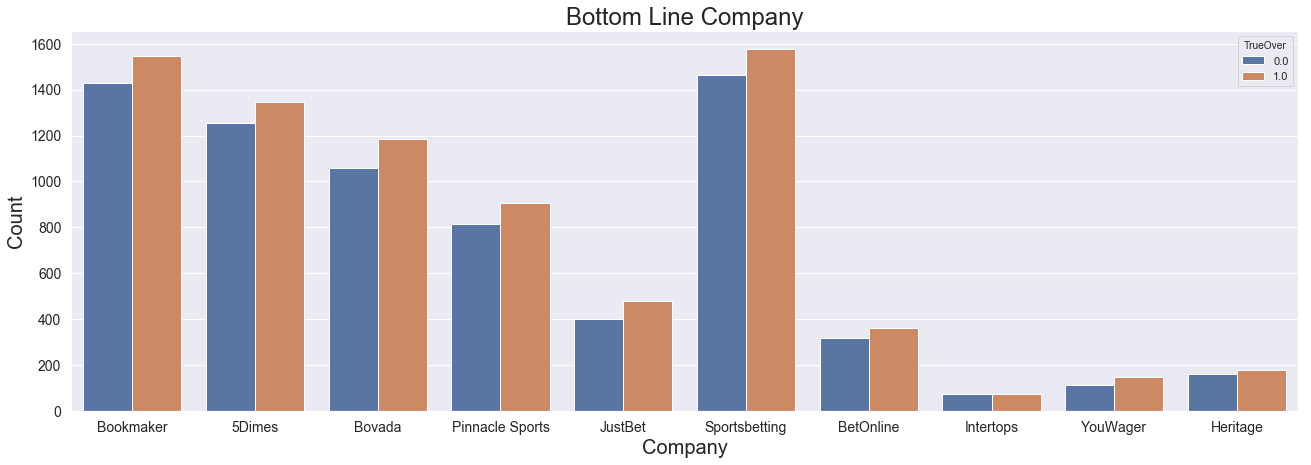

In [32]:
df3 = df2.copy(deep=True)
df3.loc[df3['WinMargin'] < df3['TopLine'], 'TrueOver'] = 0
df3.loc[df3['WinMargin'] >= df3['TopLine'], 'TrueOver'] = 1
sns.set(rc={'figure.figsize':(22,7)})
ax = sns.countplot(x="TLCompany", hue="TrueOver", data=df3)
ax.set_title("Top Line Company", fontsize=24)
ax.set_xlabel("Company",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=14)
plt.show()
df3 = df2.copy(deep=True)
df3.loc[df3['WinMargin'] < df3['BotLine'], 'TrueOver'] = 0
df3.loc[df3['WinMargin'] >= df3['BotLine'], 'TrueOver'] = 1
sns.set(rc={'figure.figsize':(22,7)})
ax = sns.countplot(x="BLCompany", hue="TrueOver", data=df3)
ax.set_title("Bottom Line Company", fontsize=24)
ax.set_xlabel("Company",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=14)
plt.show()

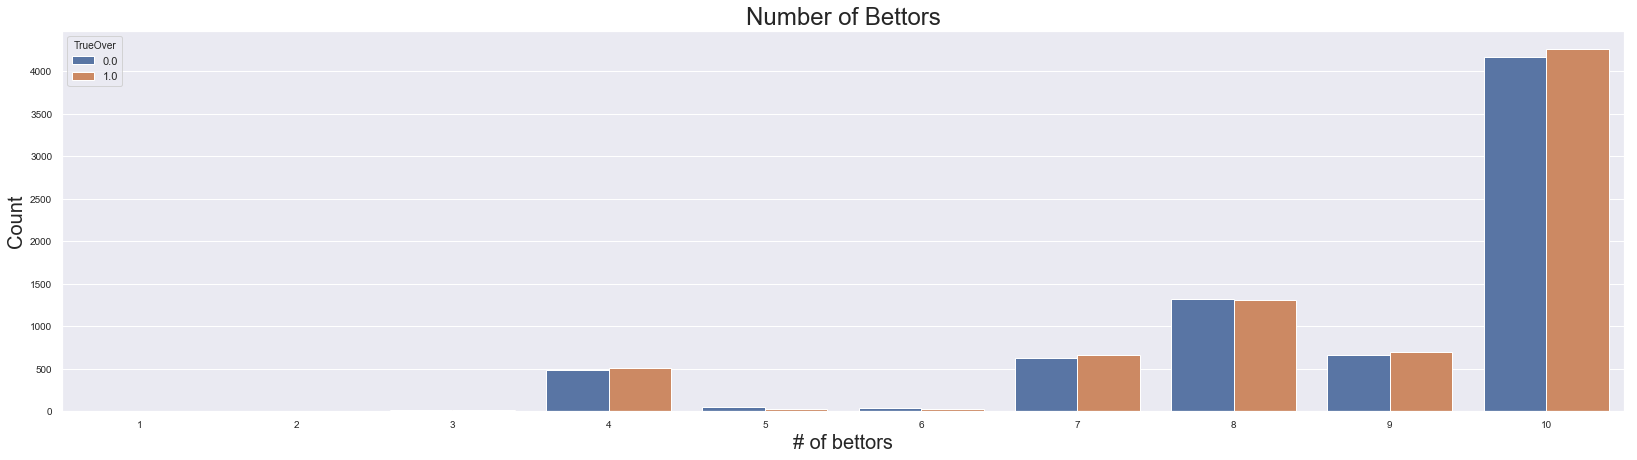

In [33]:
sns.set(rc={'figure.figsize':(28,7)})
ax = sns.countplot(x="NumComps", hue="TrueOver", data=df2)
ax.set_title("Number of Bettors", fontsize=24)
ax.set_xlabel("# of bettors",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=10)
plt.show()